# Data procurement and visualization

In [87]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Loading the data
fake = pd.read_csv("D:\Projects\Fake-News-Detector\Fake.csv")
true = pd.read_csv("D:\Projects\Fake-News-Detector\True.csv")

In [89]:
# Checking how the fake data looks like
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [90]:
# Checking different subjects and their counts for fake data
fake["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [91]:
# Checking how the true data looks like
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [92]:
# Checking different subjects and their counts for true data
true["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [93]:
# Creating a category column to determine whether the news is fake or not
fake["category"] = 1
true["category"] = 0

In [94]:
# Joining the 2 datasets together and resetting the indices
df = pd.concat([fake, true]).reset_index(drop = True)

# Checking the data
df.head()
# df.tail()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


C:\Users\Asus\AppData\Local\Temp\ipykernel_5332\171533293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="category", palette = ["red", "green"])


<Axes: xlabel='category', ylabel='count'>

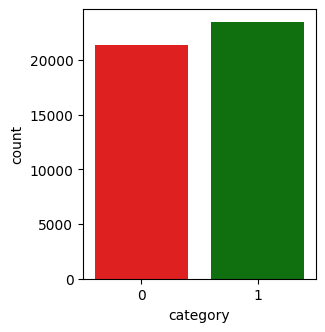

In [95]:
# Making a basic countplot of the number of fake and true news
plt.figure(figsize = (3, 3.5))
sns.countplot(data=df, x="category", palette = ["red", "green"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_5332\2362688050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="subject", palette="Set1")


<Axes: xlabel='subject', ylabel='count'>

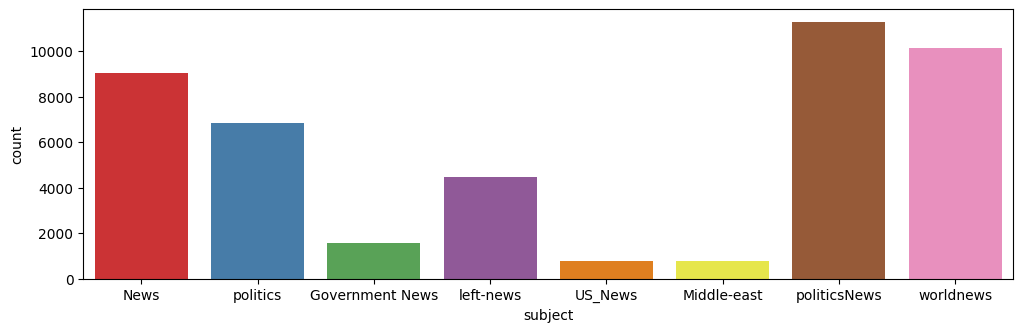

In [96]:
# Making a basic countplot of the number of different subject of news
plt.figure(figsize = (12, 3.5))
sns.countplot(data=df, x="subject", palette="Set1")

# Data Cleanup

In [97]:
# Dropping all unneccessary columns in the dataset
df = df[["text", "category"]]
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [98]:
# Checking the percentage of data that is null or is empty space
print(df.isna().sum()*100/len(df))

blanks = []
for index, text in df["text"].items():
    if text.isspace():
        blanks.append(index)
print("\nEmpty spaces: ", len(blanks))
print(blanks)

# df.text[10923]

text        0.0
category    0.0
dtype: float64

Empty spaces:  631
[10923, 11041, 11190, 11225, 11236, 11241, 11247, 11249, 11267, 11268, 11283, 11284, 11285, 11289, 11290, 11292, 11295, 11296, 11301, 11303, 11304, 11305, 11309, 11314, 11317, 11319, 11322, 11330, 11334, 11335, 11340, 11343, 11348, 11351, 11352, 11357, 11371, 11373, 11374, 11382, 11397, 11402, 11403, 11409, 11410, 11412, 11415, 11419, 11421, 11427, 11431, 11432, 11440, 11448, 11450, 11453, 11462, 11464, 11465, 11472, 11473, 11475, 11478, 11489, 11491, 11493, 11494, 11501, 11505, 11507, 11520, 11531, 11532, 11533, 11538, 11542, 11547, 11549, 11551, 11559, 11563, 11581, 11585, 11589, 11590, 11614, 11624, 11625, 11627, 11631, 11636, 11637, 11643, 11650, 11658, 11661, 11672, 11679, 11681, 11684, 11686, 11688, 11692, 11708, 11718, 11729, 11739, 11753, 11765, 11768, 11777, 11782, 11786, 11788, 11792, 11793, 11803, 11806, 11813, 11821, 11831, 11832, 11841, 11844, 11848, 11854, 11858, 11860, 11863, 11866, 11872, 11874, 11875, 1

In [99]:
# Dropping all the empty spaces from the dataset
print("Original shape of the dataframe (before dropping empty spaces): ", df.shape)
df = df.drop(blanks)
print("New shape of the dataframe (after dropping empty spaces): ", df.shape)

Original shape of the dataframe (before dropping empty spaces):  (44898, 2)
New shape of the dataframe (after dropping empty spaces):  (44267, 2)


In [100]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
nlp = spacy.load("en_core_web_sm")
lemma = WordNetLemmatizer()

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

### Stopwords
A stop word is commonly used word (such as "the", "a", "an", "in" etc.) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as a result of a search query. We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to be stop words. NLTK (Natural Language ToolKit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.